# Chapter 5 : Dynamical Forecasting Methods (Simplex and SMap Projections)

In the previous sections, we looked at the different methods to characterize a time-series and other statistical operations that we can execute to perform predictions. Many of these methods involve calculating for the models that would best fit the time series, extracting the optimal parameters that would describe the data with the least error possible. However, many real world processes exhibit nonlinear, complex, dynamic characteristics, necessitating the need of other methods that can accommodate as such.  


In this section, we will introduce and discuss methods that uses empirical models instead of complex, parametized, and hypothesized equations. Using raw time series data, we will try to reconstruct the underlying mechanisms that might be too complex, noisy, or dynamic to be captured by equations. This method proposes a altenatively more flexible approach in working and predicting with dynamic systems. 

This Notebook will discuss the following:
- Introduction to Empirical Dynamic Modelling
- Visualization of EDM Prediction with Chaotic Time Series
- Lorenz Attractor
- Taken's Theorem / State-Space Reconstruction (SSR)
- Simplex Projection
- Determination of Optimal Embedding Values (Hyperparameter Tuning)
- Differentiation Noisy Signals from Chaotic Signals
- S-Map Projection (Sequentially Locally Weighted Global Linear Map)

Prepared by: Francis James Olegario Corpuz


# Empirical Dynamic Modelling

Natural systems are often complex and dynamic (i.e. nonlinear), making them difficult to understand using linear statistical approaches. Linear approaches are fundamentally based on *correlation*, and thus, they are illposed for dynamical systems, where correlation can occur without causation, and causation may also occur in the absence of correlation.



Many scientific fields use models as approximations of reality in order to test hypothesized mechanisms, explain past observations and predict future outcomes. 

*   based on hypothesized parametric equations or known physical laws that describe simple idealized situations such as controlled single-factor experiments but do not apply to more complex natural settings
*   Empirical models, that infer patterns and associations from the data (instead of using hypothesized equations), represent an alternative and highly flexible approach.

**Empirical Dynamic Modelling (EDM)** is an emerging non-parametric, data-driven framework for modelling nonlinear systems. EDM is based on the mathematical theory of reconstructing manifolds from time-series (Takens, 1981). The EDM methods to be discussed today is the Simplex Projection (Sugihara and May, 1990) and the S-Map Projection (Sugihara, 1994).


The basic goal underlying EDM is to __reconstruct the behavior of dynamic systems using time-series data__. Because these methods operate with minimal assumptions, they are particularly suitable for studying systems that exhibit non-equilibrium dynamic and nonlinear state-dependent behavior (i.e., where interactions change over time and as a function of the system state, chaotic or near chaotic systems)




### Visualization of EDM Prediction with a  Chaotic Time Series

Given a chaotic time series, the following sets of images visualize how Empirical Dynamic Modelling tries to predict future values using the whole dataset rather that creating a parametrized equation. Let's look at the following [walkthrough](http://opetchey.github.io/RREEBES/Sugihara_and_May_1990_Nature/Simplex_projection_walkthrough.html). [Petchey, O. 2020]

Given the Time Series below, let's try to predict the possible value or location of the pink dot (the succeeding dot in the time series) in the image below.

<img src="./figures/pic1.jpg" style="width:800px">

Since this is an empirical way of looking at data, (no-prior domain knowledge models, no parametrized equations), we will look at the prior dynamics that happened just before the pink dot (the few data points highlighted by the red lines)

<img src="./figures/pic2.jpg" style="width:800px">

Given that short history of the dynamics, we will look at the "past library" of dynamics using the whole dataset and pick those that look similar to the current dynamics that we have (the most similar ones highlighted by the blue lines)

<img src="./figures/pic3.jpg" style="width:800px">

The succeeding point of the selected prior dynamics with similar pattern or trajectory (blue lines) will have their next point in sequence (highlighted by the green dots)

<img src="./figures/pic4.jpg" style="width:800px">

This green dots will then produce valuable information that the system can infer where the next value in the whole sequence (pink dot) might be be located. One way of doing this is to project the values or the location of the green dots towards the front of the sequence. The correct location is Pink dot, Green dot denotes mean location of past values)

<img src="./figures/pic5.jpg" style="width:800px">

Using a time-shifted representation of the system above, using the lagged values corresponding to the number of points used as history, the red line would represent the latest movement of the dynamics and the blue lines would correspond to the most similar ones that can give valuable information for the prediction.

<img src="./figures/pic6.jpg" style="width:800px">

### Lorenz Attractor

Now let's define a specific chaotic system that we can use as an example in the succeeding discussions.

The Lorenz Attractor is a set of chaotic solutions to the Lorenz System.
The Lorenz system is notable for having chaotic solutions for certain parameter values and initial conditions. ("Butterfly Effect"). The term "Butterfly Effect" both signifies the characteristic of the Lorenz system of having possibly huge divergent values even with very small perturbations ("the flaps of a butterfly caused a tornado in the other side of the planet") and the visual look of the system which looks like butterfly wings at certain angles. 

It's a coupled dynamic system consisting of 3 differential equations (think of the axes as variables in a dynamic system).
In an ecological examples, it could be a Resource-Prey-Predator dynamic system. 

\begin{align} \frac{dX}{dt} = \alpha Y - \alpha X   \end{align}
\begin{align} \frac{dY}{dt} = -XZ + \rho X - Y  \end{align}
\begin{align} \frac{dZ}{dt} =  XY - \beta Z \end{align}


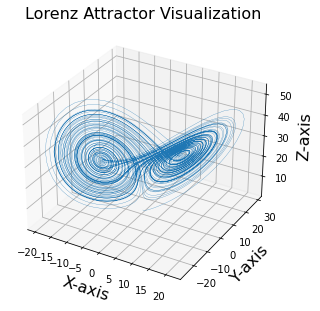

In [1]:
# Visualize Lorenz Attractor [Piziniacco. L, 2020]

import numpy as np
import matplotlib.pyplot as plt

beta = 2.66667
rho = 28.0
sigma = 10.0


def lorenz(x, y, z, beta, rho, sigma):
    Xdt = (sigma*y) - (sigma*x)
    Ydt = -(x*z) + (rho*x) - y
    Zdt = (x*y) - (beta*z)
    return Xdt, Ydt, Zdt


dT = 0.01
iteration = 10000

x_out = np.zeros(iteration)
y_out = np.zeros(iteration)
z_out = np.zeros(iteration)   

# starting point
x_out[0] = 0
y_out[0] = 1
z_out[0] = 1.05


for i in range(iteration - 1):
    curr_x, curr_y, curr_z = lorenz(x_out[i], y_out[i], z_out[i], beta, rho, sigma)
    x_out[i+1] = x_out[i] + (curr_x*dT) 
    y_out[i+1] = y_out[i] + (curr_y*dT) 
    z_out[i+1] = z_out[i] + (curr_z*dT) 
    
# Plot
fontdict={'size':16,}
fig1 = plt.figure(figsize=(5,5))
ax = fig1.gca(projection='3d')
ax.plot(x_out, y_out, z_out, lw=0.25)

ax.set_xlabel("X-axis", fontdict)
ax.set_ylabel("Y-axis", fontdict)
ax.set_zlabel("Z-axis", fontdict)
ax.set_title("Lorenz Attractor Visualization", fontdict)

plt.show()


In the visualization above, we see the that dynamic system (Lorenz) was plotted using the each of the point (or system states) computed from the differential equations. From here, we can define system states as points in a high-dimensional system.

Conversely, given a graph of a dynamic system, we can also extract the individual components or states of the system by projecting the dynamic system into on the axes. The axes can be thought as the fundamental state variables in a dynamic system. In an ecosystem, for example, these variables can correspond to population abundances, resources, or environmental conditions.

As an illustration, we can "extract" the values of the time series in one of the states (the Z-component for example) in the Lorenz Attractor above by projecting the 3D plot into just the Z-axis (which would just be similar to the **z_out** component in the code. Although time-series can represent independent state variables, in general, each time series is an observation function of the system state that can convolve several different state variables.

<img src="./figures/projection1.jpg" style="width:600px">

We can also extend the same concept to other state variables by projecting the high-dimensional graph into its individual axes.

<img src="./figures/projection3.jpg" style="width:800px">

##  Takens' Theorem / State-Space Reconstruction (SSR)

- Goal of EDM is to reconstruct the system dynamics from available time-series data (the behavior of the dynamic system is encoded in the temporal ordering of the time series)
- Theorem states that the attractor can be reconstructed using time-lags of a single time series (substituting those time lags for unknown and unobserved variables)


Instead of representing the system state with the complete set of state variables (often it is unknown), we instead use an E-dimensional lagged-coordinate Embedding), embedding = number of higher dimensions to reconstruct the state-space 

$$ \mathbf{X_t} = (\mathbf{x_t}, \mathbf{x_{t-\tau}},\mathbf{x_{t-2\tau}}..., \mathbf{x_{t-(E-1)\tau}}) $$


If sufficient lags are used, the reconstruction preserves essential mathematical properties of the original system
- reconstructed states will map one-to-one to the actual system states, and nearby points in the reconstruction will correspond to similar system states in the original state

Takens’ theorem states
that the shadow version of the dynamics reconstructed
by such an embedding preserves the essential features of
the true dynamics (so-called ‘‘topological invariance’’).
That is, if enough lags are taken, this form of reconstruction is generically a diffeomorphism and preserves
essential mathematical properties of the original system.
In other words, local neighborhoods (and their trajectories) in the reconstruction map to local neighborhoods
(and their trajectories) of the original system. [6] This is visualized below: 



In the code below, we'll try to reconstruct a manifold using the time-lagged values of the X-axis from the Lorenz Attractor:

Text(0.5, 0.92, 'Attractor Reconstruction from lagged X-values')

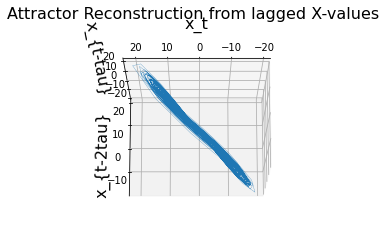

In [2]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

%matplotlib inline 

# lagged values of X from the Lorenz Attractor
xt   = x_out[:-2:5]
xt_1 = x_out[1:-1:5]
xt_2 = x_out[2::5]

# Plot
fontdict={'size':16,}
fig2 = plt.figure(figsize=(6,4))
ax = fig2.gca(projection='3d')
ax.plot(xt, xt_1, xt_2, lw=0.25)

ax.view_init(-15, 90)
ax.set_xlabel("x_t", fontdict)
ax.set_ylabel("x_{t-tau}", fontdict)
ax.set_zlabel("x_{t-2tau}", fontdict)
ax.set_title("Attractor Reconstruction from lagged X-values", fontdict)




The reconstruction above is called the "shaddow manifold" of the Lorenz Attractor on X. Or, if we refer the the Lorenz Attractor as M, we can refer to the reconstruction of time-lagged values X as Mx. The manifold above shows the historical dynamics of state-variable X.
Taken's Theorem states that Mx preserves a number of important characteristics of M:
* the topology of M
* the Lyanpunov exponents

There is also a 1-to-1 mapping betweent the original manifold and the shadow manifold. These enables us to reconstruct some of the properties of the original manifold by only using a lagged-time series of one of the axes/state variables

<img src="./figures/takens reconstruction.jpg" style="width:300px">

#  Simplex Projection


- basic idea of simplex forecasting is that even for a chaotic time series, future values may be predicted from the behaviour of similar past values (not possible with random noise)
- the reconstruction will map one-to-one to the original manifold if enough lags are used (the reconstructions has sufficiently large embedding)

NOTE: Number of embedding or dimensions does not have to be equal with the number of dimensions of the original dynamical system

Upper bound = $E < 2D + 1 $ (Whitney, 1936)


- if dimension too small, reconstructed states can overlap and appear the same even if the are in different location in the actual state-space -> poor performance in forecasting because system behavior can not be uniquely determined
- we can iterate over possible number of embedding dimensions to identify optimal number of embedding dimensions -> forecasting performance as the indicator

### Determining the Complexity of the Systems / Optimal Embedding Value (Hyperparameter Tuning)

When using Simplex projection,
a time series is typically divided into two halves, where
one half (X) is used as the library set for out-of-sample
forecasting of the reserved other half, the prediction set
(Y). Note that the prediction set is not used in the model
construction, and thus the prediction is made out of
sample. 

Simplex projection is a nonparametric analysis
in state space. The forecast for a predictee 

$$ \mathbf{Y}(\mathbf{t_k}) = \{ Y(\mathbf{t_k}), Y(\mathbf{t_k}-1), …, Y(\mathbf{t_k}-E + 1) \} $$

is given by the projections of its neighbors in the state space in the library
set, 

$$ \{ (\mathbf{X_1}), \mathbf{X_2}, …, \mathbf{X_\mathbf{(E+1)}} \} $$

where 

$$||\mathbf{X_\mathbf{(1)}} -  \mathbf{Y\mathbf{(t_k)}}|| = min(||X - Y(\mathbf{t_k})||) $$for all$$ X \neq Y $$


, $ \mathbf{X(2)} $ is the second nearest neighbor, and so on. [6]

All $E + 1$ neighboring
points from the library set form a minimal polygon (i.e.,
simplex) enclosing the predictee under embedding
dimension E. The one-step forward prediction $ \hat{Y} (\mathbf{t_k} +
1)$ can then be determined by averaging the one-step
forward projections of the neighbors

$$ {\mathbf{X_\mathbf{(1)}}(\mathbf{t_1} + 1), {\mathbf{X_\mathbf{(2)}}}(\mathbf{t_2} + 1), …, {\mathbf{X_\mathbf{(E+1)}}}(\mathbf{t_\mathbf{(E+1)}} + 1)} $$ 

By carrying out
simplex projection using different values of E, the optimal embedding dimension E can be determined according to the predictive skill. 

There are several ways to evaluate the predictive skill of simplex projection,
such as: 

*   correlation coefficient (q)
*   mean absolute error (MAE) between the observation
*   forecast results (i.e., comparing $Y(\mathbf{t_k} + 1)$ with $\hat{Y}(\mathbf{t_k} +1)) $

<img src="./figures/simplex.jpg" style="width:300px">

### Example 1: Prediction with the Simplex Algorithm (Chaotic Map Data)

In [3]:
# Install pyEDM
!pip install pyEDM

Defaulting to user installation because normal site-packages is not writeable


In [4]:
# Import libraries
import numpy as np
from numpy.random import default_rng
import pandas as pd
from pandas.plotting import autocorrelation_plot
import scipy.stats as st
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from pyEDM import *
%matplotlib inline
rng = default_rng()

###  Chaotic TentMap Data Generation
TentMap generated from the following function:

\begin{equation}
        \mathbf{x_\mathbf{(t+1)}}=
        \begin{cases}
            2\mathbf{x_t} & 0.5 > \mathbf{x_t} > 0  \\
            2-2\mathbf{x_t} & 1 > \mathbf{x_t} > 0.5
        \end{cases}
    \end{equation}

First difference was taken: $\mathbf{\triangle_t} = \mathbf{x_\mathbf{(t+1)}}- \mathbf{x_t} $

Sample visualization of a tentmap is shown below: [11]

<img src="./figures/tentmap.jpg" style="width:350px">

In [5]:
# generate TentMap timeseries

def gen_TentMap(n=1000):  
    tentmap = np.zeros(n)
    tentmap[0] = rng.random()
    r = 1.999

    for i in range(n-1):
        if tentmap[i] < 0.5:
            tentmap[i+1] = r * tentmap[i]
        else:
            tentmap[i+1] = r *(1 - tentmap[i])
    
    return tentmap
        
tentmap = gen_TentMap()
tentmap = np.diff(tentmap)
time_index = np.arange(len(tentmap))
tentmap_list  = list(zip(time_index, tentmap))

tentmap_df = pd.DataFrame(tentmap_list, columns=["Time", "TentMap"])
tentmap_df.head()

,Time,TentMap
0,0,-0.744967
1,1,0.169824
2,2,0.339477
3,3,-0.038204
4,4,0.076369


Text(0, 0.5, '$\\mathbf{\\Delta_t}}$')

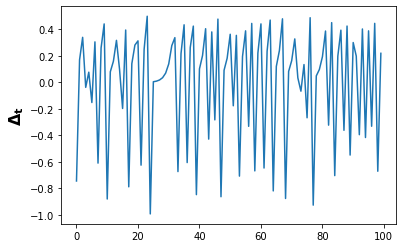

In [6]:
# plot the first 100 values to visualize the timeseries

pd.Series(tentmap_df["TentMap"][0:100]).plot()
plt.ylabel('$\mathbf{\Delta_t}}$', size=16)

In [7]:
# check for stationarity of the first-difference TentMap time-series

from statsmodels.tsa.stattools import adfuller

result = adfuller(tentmap_df["TentMap"])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -12.341769
p-value: 0.000000
Critical Values:
	1%: -3.437
	5%: -2.865
	10%: -2.568


In [8]:
# Compute for correlation coefficient for increasing Tp (timestep window)
corr_coeff_tentmap = []
for Tp in np.arange(1,11):
    simplex_out = Simplex( dataFrame = tentmap_df, lib = "1 400", pred = "450 800",  E = 3, Tp=Tp, embedded = False, showPlot = False, columns="TentMap", target="TentMap")
    metrics = pyEDM.ComputeError(simplex_out.Observations, simplex_out.Predictions)
    corr_coeff_tentmap.append(metrics['rho'])

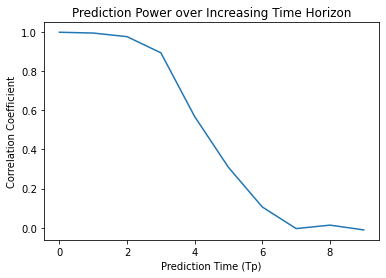

In [9]:
# corr_coeff_tentmap = [1.0, 1.0, 0.98, .88, 0.61, 0.35, 0.19, 0.08, 0.06, 0.02]
pd.Series(corr_coeff_tentmap).plot()
plt.ylabel('Correlation Coefficient')
plt.xlabel('Prediction Time (Tp)')
plt.title('Prediction Power over Increasing Time Horizon')
plt.show()

**Discussion**

We could see from the plot above that the correlation coefficient decreases as we increase the Prediction Time. This is a characteristic of a chaotic sequence, since the predicting power dissipates the further the prediction horizon.
Important properties of many natural systems is that nearby trajectories eventually diverge over time ("butterfly effect") - small perturbation in initial conditions result to very wide differences

Predictive state is dilluted over time, hindering long-term forecasting. In the plot below, we can see how the prediction skill falls off as we increase the time horizon for prediction.

In the graphs below, we compare the accuracy between the predictions given Tp = 2 (2 timesteps in to the future) as compared to Tp = 5 (5 timesteps into the future), given the same Embedding E=3 and $\tau$ = 1

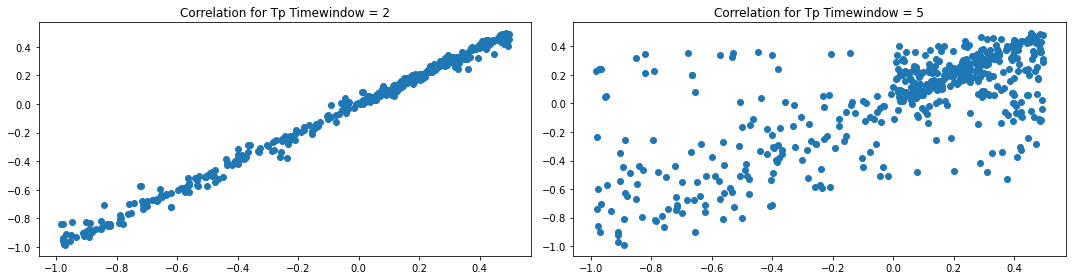

In [10]:
simplex_out_2 = Simplex( dataFrame = tentmap_df, lib = "1 500", pred = "501 999",  E = 3, Tp=2, embedded = False, showPlot = False, columns="TentMap", target="TentMap")
simplex_out_5 = Simplex( dataFrame = tentmap_df, lib = "1 500", pred = "501 999",  E = 3, Tp=5, embedded = False, showPlot = False, columns="TentMap", target="TentMap")

plt.figure(figsize=(15, 4))

plt.subplot(121)
plt.scatter(simplex_out_2.Observations[2:498], simplex_out_2.Predictions[2:498])
plt.title("Correlation for Tp Timewindow = 2")

plt.subplot(122)
plt.scatter(simplex_out_5.Observations[2:498], simplex_out_5.Predictions[2:498])
plt.title("Correlation for Tp Timewindow = 5")

plt.tight_layout()

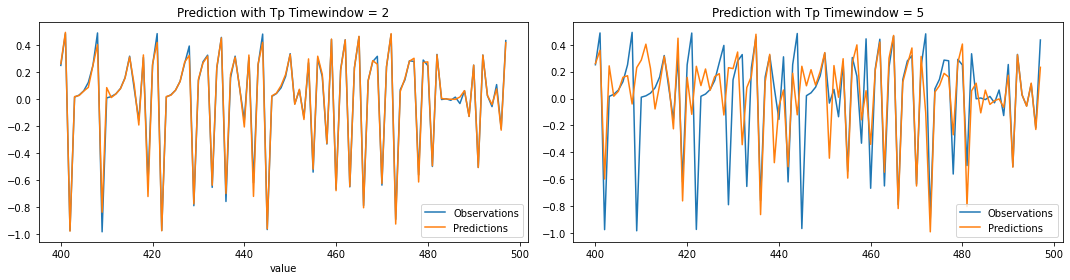

In [11]:
plt.figure(figsize=(15, 4))

plt.subplot(121)
plt.plot(simplex_out_2.Observations[400:498], label='Observations')
plt.plot(simplex_out_2.Predictions[400:498], label='Predictions')
plt.xlabel("value")
plt.legend()
plt.title("Prediction with Tp Timewindow = 2")


plt.subplot(122)
plt.plot(simplex_out_5.Observations[400:498], label="Observations")
plt.plot(simplex_out_5.Predictions[400:498], label="Predictions")
plt.legend()
plt.title("Prediction with Tp Timewindow = 5")


plt.tight_layout()

## Differentiating Noisy Signals from Chaotic Signals using Simplex Projection

Sometimes, timeseries can look similar even though their characteristics are very much different. In the plots below, we will differentiate a noisy signal from chaotic signals using Simplex Projection

Text(0.5, 1.0, 'Additive TentMap - Chaotic Signal')

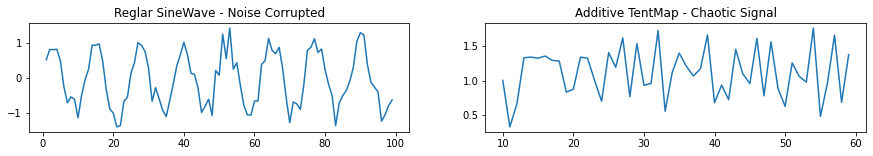

In [12]:
#Plots of sine waves corrupted by noise and tent map time series

plt.figure(figsize=(15, 2))

plt.subplot(121)
noisysine_df = pd.DataFrame()
noisysine_df['Time'] = np.arange(1,1001)
noisysine_df['Data'] = np.sin(0.5*noisysine_df['Time']) - np.random.uniform(low=-0.5, high=0.5, size=1000)
pd.Series(noisysine_df['Data'][1:100]).plot()
plt.title("Reglar SineWave - Noise Corrupted")

plt.subplot(122)
tentMap2 = gen_TentMap() + gen_TentMap()
tentMap2_df = pd.DataFrame()
tentMap2_df["Time"] = np.arange(1,1001)
tentMap2_df["Data"] = pd.Series(tentMap2)
plt.plot(tentMap2_df.Data[10:60])
plt.title("Additive TentMap - Chaotic Signal")

In [13]:
corr_coeff_sinemap = []
corr_coeff_tentmap = []
for Tp in np.arange(11):
    simplex_out = Simplex( dataFrame = noisysine_df, lib = "1 150", pred = "501 999",  E = 3, Tp=Tp, embedded = False, showPlot = False, columns="Data", target="Data")
    metrics = pyEDM.ComputeError(simplex_out.Observations, simplex_out.Predictions)
    corr_coeff_sinemap.append(metrics['rho'])
    
    simplex_tent = Simplex( dataFrame = tentMap2_df, lib = "1 150", pred = "501 999",  E = 3, Tp=Tp, embedded = False, showPlot = False, columns="Data", target="Data")
    metrics = pyEDM.ComputeError(simplex_tent.Observations, simplex_tent.Predictions)
    corr_coeff_tentmap.append(metrics['rho'])
    

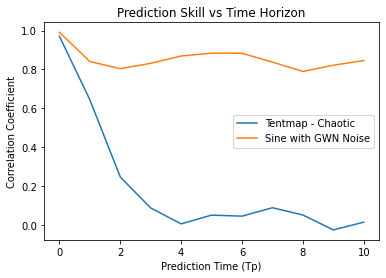

In [14]:
# corr_coeff_sinemap = [0.83, 0.81, 0.8, 0.83, 0.87, 0.86, 0.83, 0.78, 0.8, 0.83]
# corr_coeff_tentmap = [1.0, 1.0, 0.98, .88, 0.61, 0.35, 0.19, 0.08, 0.06, 0.02]
pd.Series(corr_coeff_tentmap).plot(label="Tentmap - Chaotic")
pd.Series(corr_coeff_sinemap).plot(label= "Sine with GWN Noise")
plt.ylabel('Correlation Coefficient')
plt.xlabel('Prediction Time (Tp)')
plt.title("Prediction Skill vs Time Horizon")
plt.legend(loc='best')
plt.show()


**Discussion**

As we have seen above, the SineMap corrupted by noise didn't suffer from any degradation in the correlation coefficient as prediction time progresses, white the TentMap shows the characteristic decrease in predictive power. This shows how Simplex Projection can differentiate with mere noisy signals and those with chaotic signal characteristics.

## Determining Optimal Embedding Value (E) via Simplex Iteration (Hyper Parameter Tuning)

In [15]:
# let's define a number of possible embeddings/projections/dimensions
embeds = np.arange(2,11)
data = tentmap_df

# output metrics for each embedding value
MAE = [] # Mean Absolute Error
rho = [] # Pearson correlation
RMSE = [] # Root-Mean Square Error

for e in embeds:
  simplex_result = pyEDM.Simplex(dataFrame=data, E=e, lib="1 100" , pred="201 500" , columns='TentMap', target='TentMap')
  metrics = pyEDM.ComputeError(simplex_result.Observations, simplex_result.Predictions)
  MAE.append(metrics['MAE'])
  rho.append(metrics['rho'])
  RMSE.append(metrics['RMSE'])


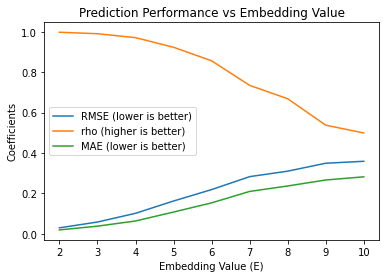

In [16]:
pd.Series(RMSE).plot(label='RMSE (lower is better)') 
pd.Series(rho).plot(label='rho (higher is better)') 
pd.Series(MAE).plot(label='MAE (lower is better)') 

x = np.arange(9)
plt.xticks(x, embeds)
plt.xlabel('Embedding Value (E)')
plt.ylabel('Coefficients')
plt.legend(loc='best')
plt.title("Prediction Performance vs Embedding Value")
plt.show()



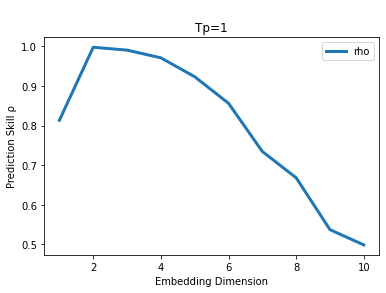

      E       rho
0   1.0  0.813284
1   2.0  0.997519
2   3.0  0.990242
3   4.0  0.970822
4   5.0  0.923086
5   6.0  0.856189
6   7.0  0.734546
7   8.0  0.668289
8   9.0  0.537366
9  10.0  0.498850


In [17]:
optimal_emdedding = pyEDM.EmbedDimension(dataFrame=tentmap_df, lib="1 100" , pred="201 500" , columns='TentMap', target='TentMap')
print(optimal_emdedding)

# Optimal embedding value E = 2 for Time Horizon, Tp = 1

Based on the plot above, we can see that the Optimal Embedding Value to be used for the State-Space Reconstruction is E=2
In the plot below, using Optimal Embedding E=2, we can plot the decreasing prediction power, as expected, since the time series is inherently chaotic

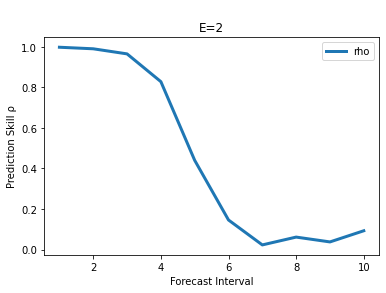

In [18]:
data = tentmap_df
rho_Tp = pyEDM.PredictInterval(dataFrame=data, lib="1 100" , pred="201 500" , columns='TentMap', target='TentMap', E = 2)

### Comparison with Uncorrelated Noise Data

In the plots above, we have shown that the Simplex Method works well in dynamic time-series. We can actually use this observation to differentiate whether a time series is chaotic or just merely corrupted by noise.

In [19]:
# Generate a Guassian White Noise Signal

noise_map = pd.Series(np.random.normal(size=1000), name='GWN').to_frame()
time_map = pd.Series(np.arange(1,1000), name='Time').to_frame()
noisy_data = pd.concat([time_map, noise_map], axis= 1)

In [20]:
# let's define a number of possible embeddings/projections/dimensions
embeds = np.arange(2,11)
data = noisy_data

# output metrics for each embedding value
MAE = [] # Mean Absolute Error
rho = [] # Pearson correlation
RMSE = [] # Root-Mean Square Error

for e in embeds:
  simplex_result = pyEDM.Simplex(dataFrame=data, E=e, lib="1 100" , pred="201 500" , columns='GWN', target='GWN')
  metrics = pyEDM.ComputeError(simplex_result.Observations, simplex_result.Predictions)
  MAE.append(metrics['MAE'])
  rho.append(metrics['rho'])
  RMSE.append(metrics['RMSE'])


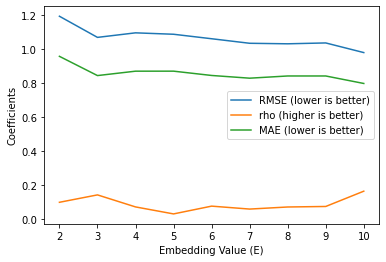

In [21]:
pd.Series(RMSE).plot(label='RMSE (lower is better)') 
pd.Series(rho).plot(label='rho (higher is better)') 
pd.Series(MAE).plot(label='MAE (lower is better)') 

x = np.arange(9)
plt.xticks(x, embeds)
plt.xlabel('Embedding Value (E)')
plt.ylabel('Coefficients')
plt.legend(loc='best')
plt.show()

### Discussion

In the plots for the RMSE, rho, and MAE, since there is no significant change in the error and correlation coefficients, we can conclude that this specific time series is not necessarily chaotic, and might just be a noise-corrupted signal.

We can then compute for an Optimal Embedding value but looking at the values of **rho**, then prediction skill is already minuted to begin with for practical values of E.


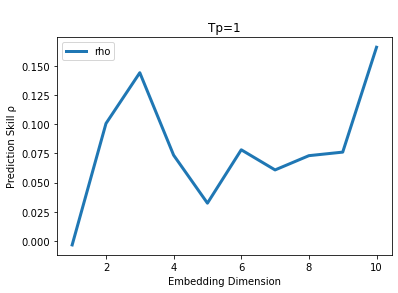

      E       rho
0   1.0 -0.003498
1   2.0  0.100611
2   3.0  0.144132
3   4.0  0.073450
4   5.0  0.032297
5   6.0  0.078051
6   7.0  0.060788
7   8.0  0.073014
8   9.0  0.076058
9  10.0  0.165966


In [22]:
optimal_emdedding = pyEDM.EmbedDimension(dataFrame=data, lib="1 100" , pred="201 500" , columns='GWN', target='GWN')
print(optimal_emdedding)

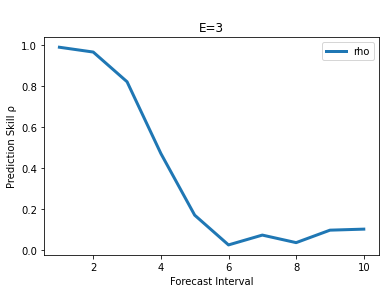

In [23]:
data = tentmap_df
rho_Tp = pyEDM.PredictInterval(dataFrame=data, lib="1 100" , pred="201 500" , columns='TentMap', target='TentMap', E = 3)

## S-MAP (Sequentially Locally Weighted Global Linear Map)

- difference from Simplex is the factor theta 
- the position of the nearby points in the state-space would have different weights (e.g., the closer the points, the higher the weights)
- used also to determine non-linear dynamical systems from linear stochastic systems
- after creating the set if time-delayed vectors (similar to the Simplex Method), the predictions are generated given a locally weighted auto-regressive model of the embedded time-series
 


$$ w(d) = exp(- \theta d / \bar{d}) $$ 

where $\theta \geq 0$

$d$ = Euclidean distance between predictee and neighbors in the embedded space

$\bar{d}$ = average distance between the predictee and all other vectors  

the parameter $\theta$ controls the degree of state dependency. 

If $\theta= 0$, all library points have the same weight
regardless of the local state of the predictee; mathematically, this model reduces to linear autoregressive
model. 

In contrast, if $\theta > 0$, the forecast given by the
S-map depends on the local state of the predictee, and
thus produces locally different fittings. Therefore, by
comparing the performance of equivalent linear
(h = 0) and nonlinear (h > 0) S-map models, one can
distinguish nonlinear dynamical systems from linear
stochastic systems.

<img src="./figures/smap.jpg" style="width:500px">

### Compare S-Map Performance of a Logistic Map (Chaotic) and Gaussian Red Noise

In the steps below, we will try to distinguish differences between Chaotic Signals and Gaussian Red Noise, which may look similar visually.

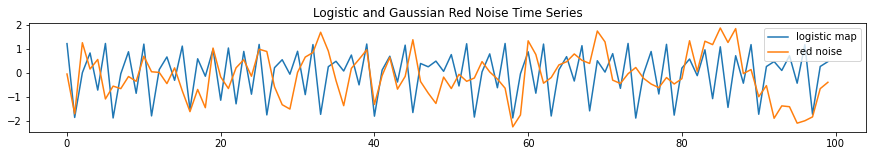

In [24]:
# Read Data and Normalize / Plot
smap_df = pd.read_csv(filepath_or_buffer='./data/ESM2_Data_noise.csv')
smap_df['R'] = (smap_df['R'] - np.mean(smap_df['R']))/np.std(smap_df['R'])
smap_df['L'] = (smap_df['L'] - np.mean(smap_df['L']))/np.std(smap_df['L'])
smap_df['T'] = pd.Series(np.arange(1,10001))
smap_df = smap_df[['T', 'R', 'L']]

plt.figure(figsize=(15, 2))

# pd.Series(smap_df['R'][0:100]).plot(color='r', label='red noise')
# pd.Series(smap_df['L'][0:100]).plot(color='b', label='logistic map')

pd.Series(smap_df['L'][0:100]).plot(label='logistic map')
pd.Series(smap_df['R'][0:100]).plot(label='red noise')
plt.title('Logistic and Gaussian Red Noise Time Series')

plt.legend(loc='best')

### Hyperparameter Tuning for Gaussian Red Noise

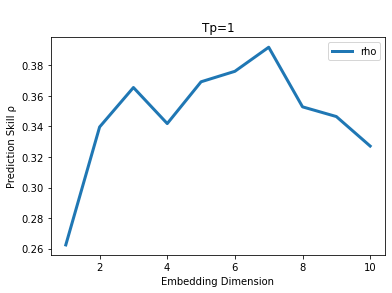

In [25]:
# Determining Optimal Embedding Dimension for Gaussian Red Noise
data = smap_df
optimal_emdedding_red_noise = pyEDM.EmbedDimension(dataFrame=data, lib="1 500" , pred="501 1000" , columns='R', target='R')

# Optimal Embedding Dimension for Gaussian Red Noise, E = 7

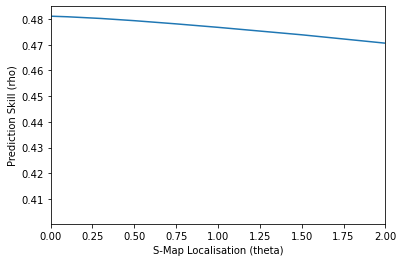

In [26]:
# Gaussian Red Noise
# Use Optimal Embedding from above, E = 7
# Analyze Prediction Skill
preds = pyEDM.PredictNonlinear(dataFrame=smap_df, E=7, lib="1 500" , pred="501 1000" , columns='R', target='R', showPlot=False)
plt.plot(preds['Theta'], preds['rho'])
plt.xlim(0, 2)
plt.ylabel('Prediction Skill (rho)')
plt.xlabel('S-Map Localisation (theta)')
plt.show()

### Discussion

Since Gaussian Red Noise is not naturally chaotic, the methods would provide smaller prediction power. In the example above, around less than 0.5 correlation, although the time series might visually look like chaotic. 

### Hyperparameter Tuning for Logistic Map

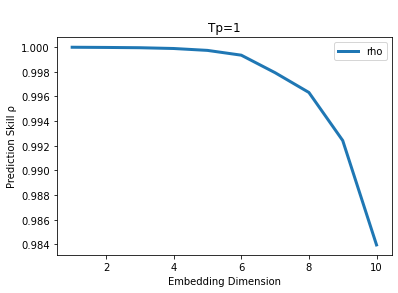

In [27]:
# Determining Optimal Embedding Dimension for the Logistic Map
data = smap_df
optimal_emdedding_log_map = pyEDM.EmbedDimension(dataFrame=data, lib="1 500" , pred="501 1000" , columns='L', target='L')

# Optimal Embedding Dimension for Logistic Map, E = 2

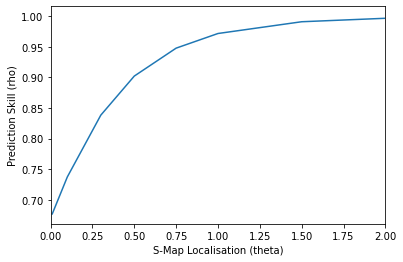

In [28]:
# Logistic Map
# Use Optimal Embedding from above, E = 2
# Analyze Prediction Skill
preds = pyEDM.PredictNonlinear(dataFrame=smap_df, E=2, lib="1 500" , pred="501 1000" , columns='L', target='L', showPlot=False)
plt.xlim([0, 2])
plt.plot(preds['Theta'], preds['rho'])
plt.ylabel('Prediction Skill (rho)')
plt.xlabel('S-Map Localisation (theta)')
plt.show()

## Forecasting Univariate, Multivariate, Multi-views

In the framework of EDM, 3 different methods have been proposed so far:


1.   Univariate Embedding (Takens 1981, Sugihara and May 1990)
2.   Multivariate Embedding (Dixon et. al, 1999, Sugihara and Deyle (2011)
1.   Multi-viw Embedding (Sugihara and Ye, 2016)








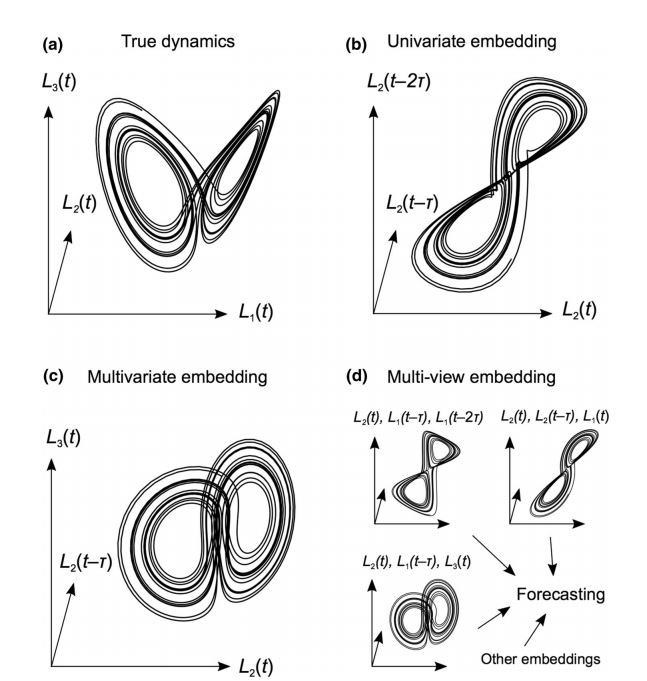

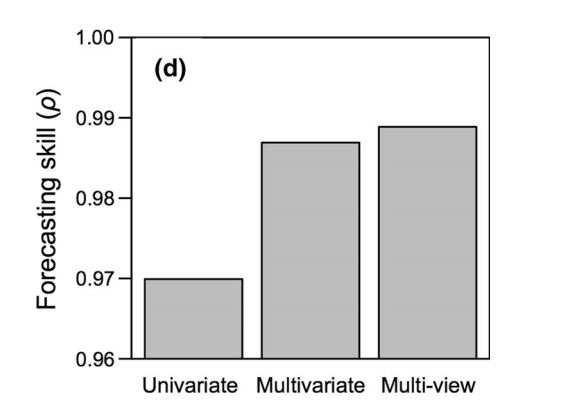

# Univariate, Multivariate and Multiview Forecasting of a Resource-Consumer-Predator Model

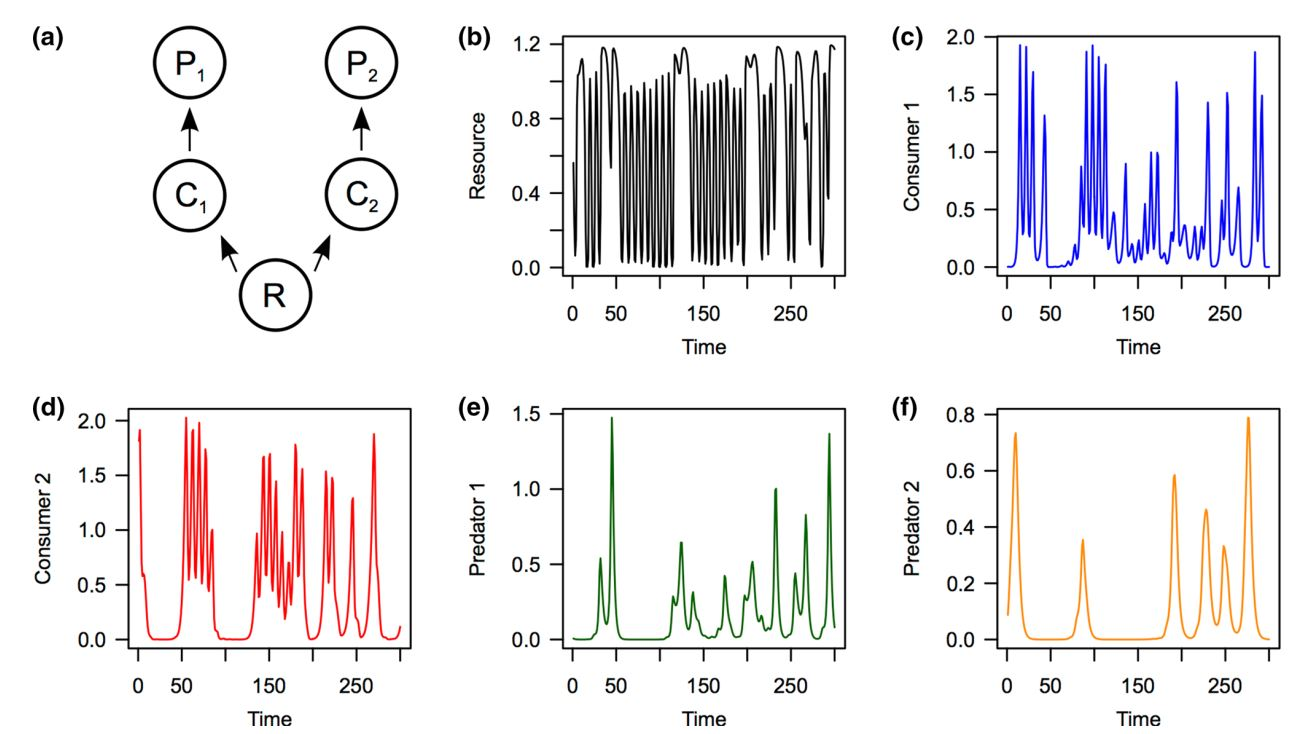

### Example: Do Prediction on C1 using different methods 


Exercises from [CW Chang 2017] [6]

### Univariate


*   use univariate embedding
*   to reconstruct the state space using only information
(history) encoded in C1. 

Using optimal embedding dimension E= 3 (precomputed)

*   state space is reconstructed using ${C1(t),C1(t - 1), C1(t - 2)}$. 
*   The forecasting skill is 0.970 



In [29]:
uni_df = pd.read_csv(filepath_or_buffer='./data/5 specie data set.csv', index_col=False)
uni_df['Time'] = pd.Series(np.arange(2000))
uni_df = uni_df[['Time', 'R', 'C1', 'C2','P1', 'P2']]
uni_df.head()

,Time,R,C1,C2,P1,P2
0,0,0.562018,0.002226,1.815200,0.006884,0.087266
1,1,0.238250,0.002987,1.913687,0.004210,0.137499
2,2,0.063778,0.002384,1.275531,0.002576,0.210435
3,3,0.153577,0.001665,0.692132,0.001572,0.286715
4,4,0.860214,0.002310,0.578684,0.000959,0.352087


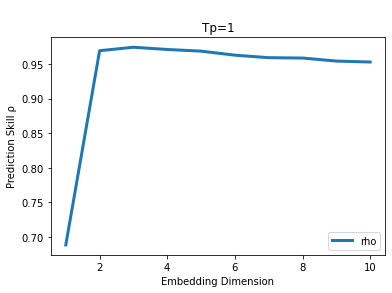

      E       rho
0   1.0  0.688288
1   2.0  0.969399
2   3.0  0.974422
3   4.0  0.971195
4   5.0  0.968775
5   6.0  0.962940
6   7.0  0.959300
7   8.0  0.958808
8   9.0  0.954404
9  10.0  0.953030


In [30]:
optimal_emdedding = pyEDM.EmbedDimension(dataFrame=uni_df, lib="1 1000" , pred="1001 1999" , columns='C1', target='C1')
print(optimal_emdedding)

From the data above, optimal Embedding E = 3 with highest correlation coefficient (forecasting skill) rho = 0.974439

In [31]:
simplex_out_uni = Simplex( dataFrame =uni_df, lib = "1 1000", pred = "1001 1999",  E = 3, Tp=1, embedded = False, showPlot = False, columns="C1", target="C1")

In [32]:
simplex_out_uni.head(5)

,Time,Observations,Predictions,Pred_Variance
0,1000,0.226670,NaN,NaN
1,1001,0.433118,0.415078,0.002822
2,1002,0.843978,0.728465,0.010937
3,1003,1.465515,1.402749,0.052009
4,1004,1.413874,1.747335,0.008604


Text(0.5, 1.0, 'Prediction with Embedding E = 3')

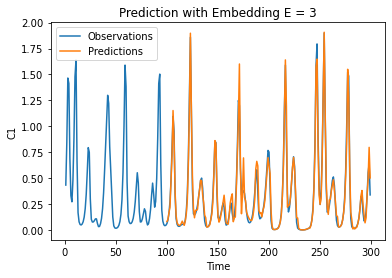

In [33]:
# Plot of Predictions vs Observations

plt.plot(simplex_out_uni.Observations[1:300], label='Observations')
plt.plot(simplex_out_uni.Predictions[100:300], label='Predictions')
plt.xlabel("Time")
plt.ylabel("C1")
plt.legend()
plt.title("Prediction with Embedding E = 3")

### Multivariate



*   information in R and P1 is useful for forecasting the population dynamics of C1
*   use ${R(t), P1(t), C1(t)}$ (i.e., native multivariate embedding w/o
using lagged values)
*   The forecasting skill is 0.987
*   Since for C1, optimal embedding dimension is 3,  ${R(t), P1(t), C1(t)}$ is
sufficient
*   if, for example, computed optimal embessing is 4, use ${C1(t-1)}$

In [34]:
multivariate_out = Simplex( dataFrame =uni_df, lib = "1 200", pred = "500 700", E = 3, Tp=1, embedded = False, showPlot = False, columns="R P1 C1", target="C1")

In [35]:
multivariate_out.head(5)

,Time,Observations,Predictions,Pred_Variance
0,499,0.879706,NaN,NaN
1,500,0.981080,1.157826,0.031553
2,501,0.694387,1.009867,0.114386
3,502,0.150185,0.228026,0.021878
4,503,0.013382,0.049704,0.003086


Text(0.5, 1.0, 'Prediction with Embedding E = 3')

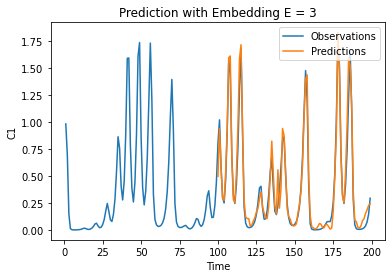

In [36]:
plt.plot(multivariate_out.Observations[1:200], label='Observations')
plt.plot(multivariate_out.Predictions[100:200], label='Predictions')
plt.xlabel("Time")
plt.ylabel("C1")
plt.legend()
plt.title("Prediction with Embedding E = 3")

### Multi-view


*   a recent technique developed only last 2016 (Sugihara and Ye)
*   makes use of different variables with different time-lags
*   given $l$ lags and $n$ variables, the number of E-dimensional variables combinations is: (given a prior computed Embedding E)

$m$ = $\mathbf{nl \choose E} $ - $\mathbf{n(l-1) \choose E }$



*   choose the top-k reconstructions, ranked by forecasting skill
*   top k = $\sqrt(m)$
*   forecasting skill on the R-C-P Model: 0.987

In [37]:
multiview_out = pyEDM.Multiview(dataFrame =uni_df, lib = "1 200", pred = "500 700",  E = 3, Tp=1, showPlot = False, columns="R C1 C2 P1 P2", target="C1")

Text(0.5, 1.0, 'Prediction with Embedding E = 3')

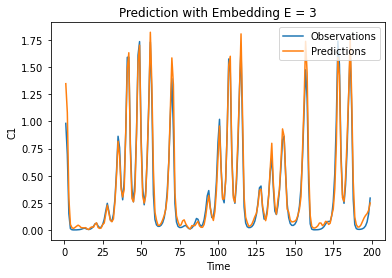

In [39]:
plt.plot(multiview_out['Predictions'].Observations[1:200], label='Observations')
plt.plot(multiview_out['Predictions'].Predictions[1:200], label='Predictions')
plt.xlabel("Time")
plt.ylabel("C1")
plt.legend()
plt.title("Prediction with Embedding E = 3")

### For the Lorenz Attractor


*   there are three state-variables $L1, L2, L3$
*   given 3-variables, and 2 lag-times (lag-times are arbitrarily set)

$m$ = $\mathbf{(3 x 2) \choose 3} $ - $\mathbf{3 x (2-1) \choose 3 }$

$m = 19$



*   top k = $\sqrt(19)$, ~ top-4 or top-5 views based on forecasting skill


<img src="./figures/lorenz.jpg" style="width:500px">






## In the next section...

We will other applications of Empirical Dynamic Modelling techniques, especially when we would like to see whether each shaddow manifold can be described as a source of causation to other time series. We will build on the concepts that we have described the in the notebook (Simplex Projections, etc) to identify possible causalities between different variables in a complex dynamical system by still looking at just the empirical data.

# Application to the Jenna Climate Dataset

We will now try to apply the Simplex Projection and SMap Projection to the Jenna Climate Dataset for 1 variable prediction

In [40]:
# Import Libraries
import numpy as np
from numpy.random import default_rng
import pandas as pd
from pandas.plotting import autocorrelation_plot
import scipy.stats as st
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from sklearn.metrics import mean_absolute_error
from tqdm import tqdm
from pyEDM import *
%matplotlib inline
rng = default_rng()


In [45]:
# read training data and test data
train_df = pd.read_csv(filepath_or_buffer='./data/train_series.csv')
test_df = pd.read_csv(filepath_or_buffer='./data/test_series.csv')
val_df = pd.read_csv(filepath_or_buffer='./data/val_series.csv')



In [46]:
# Print sizes
print("Training Set Size: {}".format(train_df.shape))
print("Validation Set Size: {}".format(val_df.shape))
print("Test Set Size: {}".format(test_df.shape))


Training Set Size: (35045, 15)
Validation Set Size: (17524, 15)
Test Set Size: (17523, 15)


In [47]:
## Concatenate the Dataframes into one

climate_df = pd.concat([train_df, val_df, test_df])

Since we will be limiting the application to Univariate (Temperature) Prediction, we will drop all other columns.
As a requirement of the pyEDM library, we need to rename the first column into "Time

In [48]:
# Drop other columns
climate_df = climate_df.drop(climate_df.columns[3:], axis=1)
climate_df = climate_df.drop(climate_df.columns[1], axis=1)

# Rename first column to "Time", the Temperature into a friendly string
climate_df = climate_df.rename(columns = {'T (degC)': 'Temperature'})
climate_df = climate_df.rename(columns = {'Unnamed: 0': 'Time'})
climate_df.reset_index(drop=True)


,Time,Temperature
0,0,-8.02
1,6,-7.62
2,12,-8.85
3,18,-8.84
4,24,-9.23
...,...,...
70087,420522,-1.40
70088,420528,-2.15
70089,420534,-2.61
70090,420540,-3.22


Text(0, 0.5, 'Temperature (C) - Training Plus Validation')

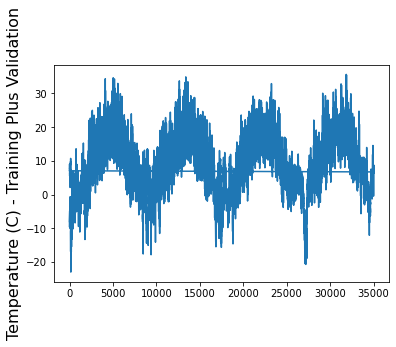

In [49]:
# plot the training set and testing set combined

data_size = train_df.shape[0] + val_df.shape[0]
pd.Series(climate_df["Temperature"][0:data_size]).plot()
plt.ylabel('Temperature (C) - Training Plus Validation', size=16)

Text(0, 0.5, 'Temperature (C) - Test')

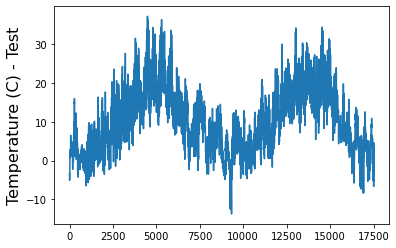

In [50]:
# plot the test set

pd.Series(climate_df["Temperature"][data_size:]).plot()
plt.ylabel('Temperature (C) - Test', size=16)

In [51]:
# quick check for stationarity in the training set and testing set

from statsmodels.tsa.stattools import adfuller

result = adfuller(climate_df["Temperature"][0:data_size])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))
    
# quick test shows stationarity 

ADF Statistic: -7.958617
p-value: 0.000000
Critical Values:
	1%: -3.430
	5%: -2.862
	10%: -2.567


### Hyperparameter Tuning (Calculation of Optimal Embedding)

100%|██████████| 100/100 [04:37<00:00,  2.78s/it]


<AxesSubplot:xlabel='E'>

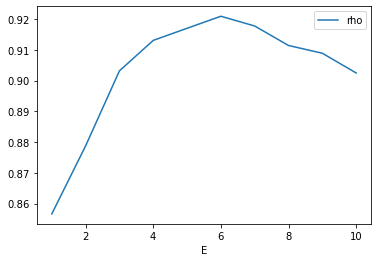

In [54]:
# Calculate Optimal Embedding by looking at various time chunks

rho_values = pd.DataFrame(data=np.zeros((10,2)), columns = ['E', 'rho'])
# starting row of validation data 
start_pt = 35046 
num_blocks = 100


for i in tqdm(range(num_blocks)):
    starting = (24*i) + start_pt
    ending = starting + 24 - 1
    preds = str(starting) + " " + str(ending)
    starting = ending + 1

    current_rho = pyEDM.EmbedDimension(dataFrame=climate_df, lib="1 35045" , pred=preds , columns='Temperature', target='Temperature', showPlot=False)
    rho_values.rho = rho_values.rho + current_rho.rho
    rho_values.E = current_rho.E

rho_values.rho = rho_values.rho / num_blocks
rho_values.plot('E', 'rho')


In [ ]:
# Calculate optimal embedding E using all values (not by chunks)
# time period is from 35046 to 52326

rho_whole = pyEDM.EmbedDimension(dataFrame=climate_df, lib="1 35045" , pred="35046 52326" , columns='Temperature', target='Temperature', showPlot=False)
rho_whole.plot('E', 'rho')

### Computation of MAE using Simplex Projection Method

In [56]:
MAE = []
e = 6
start_pt = 52570
num_blocks = 100
for i in tqdm(range(num_blocks)):
    starting = (24*i) + start_pt
    ending = starting + 24 - 1
    preds = str(starting) + " " + str(ending)
    starting = ending + 1

    climate_result = pyEDM.Simplex(dataFrame=climate_df, lib="1 35045", pred=preds, Tp=24, columns="Temperature", target="Temperature", E = e, showPlot=False)
    mae_current = mean_absolute_error(climate_result.Observations[:24].to_numpy(), climate_result.Predictions[24:].to_numpy())
    MAE.append(mae_current)

100%|██████████| 100/100 [00:16<00:00,  6.11it/s]


In [57]:
np.mean(MAE)

1.2339145175433177

In [ ]:
# Forecast Interval / Prediction Decay
rho_Tp = pyEDM.PredictInterval(dataFrame=train_val_df, lib="1 35044" , pred="35046 35070" , columns='Temperature', target='Temperature', E = 6)


### Computation of MAE using the SMap Method

In [58]:
MAE_smap = []
e = 6
start_pt = 52570
num_blocks = 100
for i in tqdm(range(num_blocks)):
    starting = (24*i) + start_pt
    ending = starting + 24 - 1
    preds = str(starting) + " " + str(ending)
    starting = ending + 1

    climate_result = pyEDM.SMap(dataFrame=climate_df, lib="1 35045", pred=preds, Tp=24, columns="Temperature", target="Temperature", E = e, theta = 0.03, showPlot=False)
#     print(climate_result['predictions'].Observations)
    mae_current = mean_absolute_error(climate_result['predictions'].Observations[:24].to_numpy(), climate_result['predictions'].Predictions[24:].to_numpy())
    MAE_smap.append(mae_current)

100%|██████████| 100/100 [00:32<00:00,  3.10it/s]


In [59]:
np.mean(MAE_smap)

0.5050182906423609

In [ ]:
# Predict Nonlinearity

rho_Theta = pyEDM.PredictNonlinear(dataFrame=train_val_df, lib="1 35045" , pred="35046 35070" , columns='Temperature', target='Temperature', showPlot=False)
rho_Theta.plot('Theta', 'rho')


## NOTE: 

Currently, the more than accurate-than-expected results are still being investigated as it can not be concluded with high certainty that there is no data leakage present. The functions are being studied and reviewed to see how to operationalize the library to predict values outside of historical data present in the DataFrame



## Summary

- Simplex and SMaps are non-parametric methods of analyzing and predicting time-series, especially in dynamic systems where chaos might be present
- Both methods use lagged-values to reconstruct a manifold in higher dimensional space, and use various iterations of nearest neighbor methods to predict location of points in the manifold
- Since it is not parametric, there is a need to recreate the library everytime a prediction is to be done, increasing computatonal complexity



## In the next section...

We will other applications of Empirical Dynamic Modelling techniques, especially when we would like to see whether each shaddow manifold can be described as a source of causation to other time series. We will build on the concepts that we have described the in the notebook (Simplex Projections, etc) to identify possible causalities between different variables in a complex dynamical system by still looking at just the empirical data.

## References

The Contents of the Notebook is compiled from the following references:
1.   Sugihara Lab, 2020. "Empirical Dynamic Modelling", https://deepeco.ucsd.edu/nonlinear-dynamics-research/edm/ - visited 25 November, 2020
2.   Petchey, O. 2020 "Simplex Projection Walkthrough", http://opetchey.github.io/RREEBES/Sugihara_and_May_1990_Nature/Simplex_projection_walkthrough.html, DOI 10.5281/zenodo.57081, visited 25 November, 2020
1.   Sugihara, G. & May, R.M. (1990) Nonlinear forecasting as a way of distinguishing chaos from measurement error in time series. Nature, 344, 734–741.
2.   Perretti, C.T., Munch, S.B. & Sugihara, G. (2013) Model-free forecasting outperforms the correct mechanistic model for simulated and experimental data. Proceedings of the National Academy of Sciences (PNAS), 110, 5253–5257.)
1.   "Introduction to Empirical Modelling", Sugihara Lab,  link: https://www.youtube.com/watch?v=8DikuwwPWsY - visited 25 november 2020
2.   CW Chang, M Ushio, C Hsieh, 2017 "Empirical dynamic modeling for beginners", - Ecological Research
1.   Quanta Magazine, 2020. "A Twisted Path to Equation-Free Prediction", https://www.quantamagazine.org/chaos-theory-in-ecology-predicts-future-populations-20151013, visited 28 November 2020
2.   https://en.wikipedia.org/wiki/Lorenz_system, visited 30 November 2020
1.   "Introduction to Empirical Dynamic Modelling, Sugihara Lab, https://www.youtube.com/watch?v=fevurdpiRYg, visited 30 November 2020
1.   "Equation and parameter free dynamical modeling of natural time series", Fundamentals of Statistics and Computation for Neuroscientists Youtube Channel, https://www.youtube.com/watch?v=6yq0VAriUIQ
2. "ADS : Vol 4 : Chapter 4.1 : The Tent Map", Prof. Ghrist Math Youtube Channel, https://www.youtube.com/watch?v=TzEmZ1FXxNw&t=122s
1. Piziniacco. L, 2020. "Python, Complex Systems, Chaos and Lorenz Attractor", https://medium.com/@lucpiz/python-complex-systems-chaos-and-lorenz-attractor-28499de3f36a - visited February 2, 2021
2. "rEDM Tutorial.pdf - Applications of Empirical Dynamic Modelling in Time Series", SugiharaLab Github, https://github.com/SugiharaLab/rEDM/blob/master/vignettes/rEDM-tutorial.pdf, visited 25 November 2020 